In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load dataset (built-in)
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [5]:
# 2. Preprocess: Pad sequences
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)



In [6]:
# 3. Build model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



2025-08-01 05:17:52.654550: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
# 4. Train
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9694 - loss: 0.0896 - val_accuracy: 0.8690 - val_loss: 0.4559
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.9788 - loss: 0.0649 - val_accuracy: 0.8584 - val_loss: 0.5087
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.9779 - loss: 0.0655 - val_accuracy: 0.8618 - val_loss: 0.4898
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.9844 - loss: 0.0469 - val_accuracy: 0.8526 - val_loss: 0.5768
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.9897 - loss: 0.0346 - val_accuracy: 0.8546 - val_loss: 0.6918


In [9]:
# 5. Evaluate
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8522 - loss: 0.7213
Test Accuracy: 0.8522


In [10]:
# 6. Predict
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step


In [11]:
# 7. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))



Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.83      0.85     12500
    Positive       0.84      0.87      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



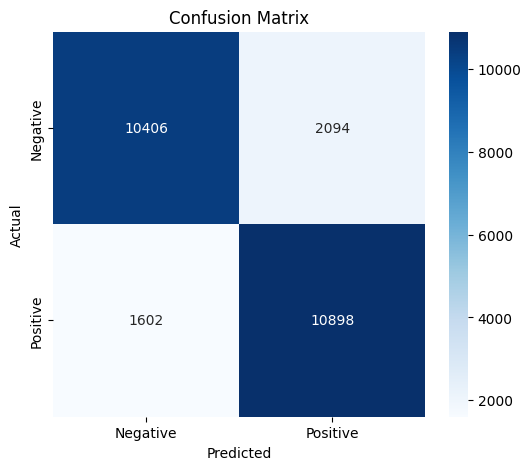

In [12]:
# 8. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

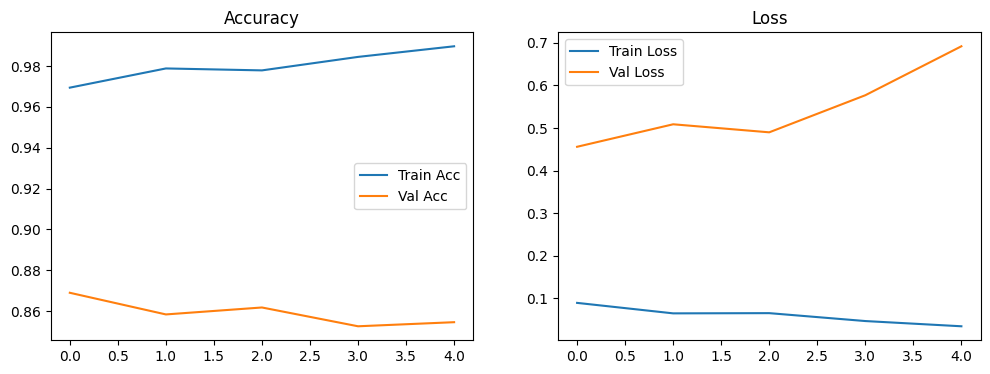

In [13]:
# 9. Accuracy and loss plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

In [14]:
# 10. Misclassified reviews (text reconstruction)
word_index = imdb.get_word_index()
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"
reverse_word_index[3] = "<UNUSED>"

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i, "?") for i in encoded_review])

# Show 5 misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0][:5]
for i in misclassified_indices:
    print(f"\nReview {i} (True: {y_test[i]}, Pred: {y_pred[i]}):")
    print(decode_review(x_test[i]))


Review 2 (True: 1, Pred: 0):
everyone's horror the <UNK> promptly eats the mayor and then goes on a merry rampage <UNK> citizens at random a title card <UNK> reads news of the king's <UNK> throughout the kingdom when the now terrified <UNK> once more <UNK> <UNK> for help he loses his temper and <UNK> their community with lightning <UNK> the moral of our story delivered by a hapless frog just before he is eaten is let well enough alone br br considering the time period when this startling little film was made and considering the fact that it was made by a russian <UNK> at the height of that <UNK> country's civil war it would be easy to see this as a <UNK> about those events <UNK> may or may not have had <UNK> turmoil in mind when he made <UNK> but whatever <UNK> his choice of material the film stands as a <UNK> tale of universal <UNK> <UNK> could be the soviet union italy germany or japan in the 1930s or any country of any era that lets its guard down and is overwhelmed by <UNK> it's a